In [1]:
%cd '/content/drive/MyDrive/8th-semester/IR/IR_Project_W23/src'

/content/drive/MyDrive/8th-semester/IR/IR_Project_W23/src


In [2]:
import pandas as pd
import numpy as np
import os
import re
import warnings
from tqdm import tqdm, trange
warnings.filterwarnings("ignore")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# read data from the csv file (from the location it is stored)
data_dir = '../data/'
data_list = os.listdir(data_dir)
dataframe_list = []
print(data_list)

for data_file in data_list:
    if '.json' not in data_file:
        continue
    data_path = data_dir + data_file
    data_name = data_file[:-5]
    save_data_path = data_dir + 'summary/' + data_name + '.xlsx'
    print("Data File:", data_name)
    Data = pd.read_json(data_path)
    Data = Data.astype(str)
    rows, columns = Data.shape
    dataframe_list.append(Data)

Data = pd.concat(dataframe_list)
Data.rename(columns={'summary':'headline', 'text_captions':'text'}, inplace = True)
Data.head()

['cnn10.json', 'cnn10_full.json', 'ramsay10.json', 'ted.json', 'reviews.json', 'podcasts.json', 'summary', 'LSTM_Attention']
Data File: cnn10
Data File: cnn10_full
Data File: ramsay10
Data File: ted
Data File: reviews
Data File: podcasts


,id,text,fused_captions,headline
0,8GgaCgjAFLM,[music] Thank you Hello lovely people Happy! F...,"[{'text': '[Music]', 'start': 0.0, 'duration':...",It's been nearly three years since the start ...
1,Kc_GMYHJNFQ,[music] Thank you hello everyone Wonderful! We...,"[{'text': '[Music]', 'start': 0.0, 'duration':...","Some farmers are not harvesting any tomatoes,..."
2,wPdiuj2JwEU,[music] Thank you Hey there everyone Terrific!...,"[{'text': '[Music]', 'start': 0.0, 'duration':...",CNN Business Correspondent Rahel Solomon has ...
3,H07TJT3VpSY,"[music] Thank you! What's up Sunshine, Welcome...","[{'text': '[Music]', 'start': 0.0, 'duration':...",Friday marked one year since Russian Presiden...
4,U4WxR7hXfCQ,[music] Thank you! What's up lovely people? Th...,"[{'text': '[Music]', 'start': 0.0, 'duration':...",Massive storm system pummeling much of the co...


In [6]:
Data

,id,text,fused_captions,headline
0,8GgaCgjAFLM,[music] Thank you Hello lovely people Happy! F...,"[{'text': '[Music]', 'start': 0.0, 'duration':...",It's been nearly three years since the start ...
1,Kc_GMYHJNFQ,[music] Thank you hello everyone Wonderful! We...,"[{'text': '[Music]', 'start': 0.0, 'duration':...","Some farmers are not harvesting any tomatoes,..."
2,wPdiuj2JwEU,[music] Thank you Hey there everyone Terrific!...,"[{'text': '[Music]', 'start': 0.0, 'duration':...",CNN Business Correspondent Rahel Solomon has ...
3,H07TJT3VpSY,"[music] Thank you! What's up Sunshine, Welcome...","[{'text': '[Music]', 'start': 0.0, 'duration':...",Friday marked one year since Russian Presiden...
4,U4WxR7hXfCQ,[music] Thank you! What's up lovely people? Th...,"[{'text': '[Music]', 'start': 0.0, 'duration':...",Massive storm system pummeling much of the co...
...,...,...,...,...
88,d5ibrH8vAP4,[music] Foreign. [Applause] Hello and welcome ...,"[{'text': '[Music]', 'start': 0.09, 'duration'...",Each of these gifts has a year written on it ...
89,W53B_0VBF78,You are so optimistic Check check one to gliob...,"[{'text': 'You are so optimistic', 'start': 3....",Aaron says he's not sure how to use the Pop-u...
90,79x1HunQ6qU,"Oh All Right, we're here. A pirate's dinner ad...","[{'text': 'Oh', 'start': 0.0, 'duration': 2.0,...",The plan is to go to medieval Times Dinner Di...
91,juLbFrGFDf0,[music] It tastes like dirt. It does taste lik...,"[{'text': '[Music]', 'start': 0.09, 'duration'...","There are more than 300 flavors of KitKat, an..."


**Cleaning** **the** **dataset**

In [7]:
df=Data[Data['text'].isnull()==False]
df=Data[Data['headline'].isnull()==False]
df=df[df['text']!='nan']

df.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates

In [8]:
df

,id,text,fused_captions,headline
0,8GgaCgjAFLM,[music] Thank you Hello lovely people Happy! F...,"[{'text': '[Music]', 'start': 0.0, 'duration':...",It's been nearly three years since the start ...
1,Kc_GMYHJNFQ,[music] Thank you hello everyone Wonderful! We...,"[{'text': '[Music]', 'start': 0.0, 'duration':...","Some farmers are not harvesting any tomatoes,..."
2,wPdiuj2JwEU,[music] Thank you Hey there everyone Terrific!...,"[{'text': '[Music]', 'start': 0.0, 'duration':...",CNN Business Correspondent Rahel Solomon has ...
3,H07TJT3VpSY,"[music] Thank you! What's up Sunshine, Welcome...","[{'text': '[Music]', 'start': 0.0, 'duration':...",Friday marked one year since Russian Presiden...
4,U4WxR7hXfCQ,[music] Thank you! What's up lovely people? Th...,"[{'text': '[Music]', 'start': 0.0, 'duration':...",Massive storm system pummeling much of the co...
...,...,...,...,...
88,d5ibrH8vAP4,[music] Foreign. [Applause] Hello and welcome ...,"[{'text': '[Music]', 'start': 0.09, 'duration'...",Each of these gifts has a year written on it ...
89,W53B_0VBF78,You are so optimistic Check check one to gliob...,"[{'text': 'You are so optimistic', 'start': 3....",Aaron says he's not sure how to use the Pop-u...
90,79x1HunQ6qU,"Oh All Right, we're here. A pirate's dinner ad...","[{'text': 'Oh', 'start': 0.0, 'duration': 2.0,...",The plan is to go to medieval Times Dinner Di...
91,juLbFrGFDf0,[music] It tastes like dirt. It does taste lik...,"[{'text': '[Music]', 'start': 0.09, 'duration'...","There are more than 300 flavors of KitKat, an..."


In [9]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
  str = text.lower()
  str = BeautifulSoup(str, "lxml").text
  str = re.sub(r'\([^)]*\)', '', str)
  str = re.sub('"','', str)
  str = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in str.split(" ")])    
  str = re.sub(r"'s\b","",str)
  str = re.sub("[^a-zA-Z]", " ", str) 
  str = re.sub('[m]{2,}', 'mm', str)
  if(num==0):
    str = re.sub(r'\.',' . ',str)
  if(num==0):
      tokens = [w for w in str.split() if not w in stop_words]
      
  else:
      tokens=str.split()
  long_words=[]
  for i in tokens:
      if len(i)>1:                                                 #removing short words
          long_words.append(i)
  return (" ".join(long_words)).strip()

In [10]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not","didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not","he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is","I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would","i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would","it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have","mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have","she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is","should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as","this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would","there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have","wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are","we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are","what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is","where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have","why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have","would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have","you're": "you are", "you've": "you have"}

In [11]:
#call the function
clean_text = []
for t in df['text']:
    clean_text.append(text_cleaner(t,0))

In [12]:
#call the function
clean_summary = []
for t in df['headline']:
    clean_summary.append(text_cleaner(t,0))

In [13]:
df['text']=clean_text
df['headline']=clean_summary

df.replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

Updating the df

In [14]:
df

,id,text,fused_captions,headline
0,8GgaCgjAFLM,music thank hello lovely people happy friday e...,"[{'text': '[Music]', 'start': 0.0, 'duration':...",nearly three years since start covid pandemic ...
1,Kc_GMYHJNFQ,music thank hello everyone wonderful wednesday...,"[{'text': '[Music]', 'start': 0.0, 'duration':...",farmers harvesting tomatoes peppers eggplants ...
2,wPdiuj2JwEU,music thank hey everyone terrific tuesday coy ...,"[{'text': '[Music]', 'start': 0.0, 'duration':...",cnn business correspondent rahel solomon next ...
3,H07TJT3VpSY,music thank sunshine welcome back hope wonderf...,"[{'text': '[Music]', 'start': 0.0, 'duration':...",friday marked one year since russian president...
4,U4WxR7hXfCQ,music thank lovely people weekend upon us frid...,"[{'text': '[Music]', 'start': 0.0, 'duration':...",massive storm system pummeling much country ca...
...,...,...,...,...
88,d5ibrH8vAP4,music foreign applause hello welcome minute po...,"[{'text': '[Music]', 'start': 0.09, 'duration'...",gifts year written guess popular toy year powe...
89,W53B_0VBF78,optimistic check check one glioblastoma check ...,"[{'text': 'You are so optimistic', 'start': 3....",aaron says sure use pop hot dog toaster says u...
90,79x1HunQ6qU,oh right pirate dinner adventure oh yeah hell ...,"[{'text': 'Oh', 'start': 0.0, 'duration': 2.0,...",plan go medieval times dinner dinner tournamen...
91,juLbFrGFDf0,music tastes like dirt taste like dirt think g...,"[{'text': '[Music]', 'start': 0.09, 'duration'...",flavors kitkat rate scale doo doo eh gonna nut...


**Analyzing the sequence distribution**

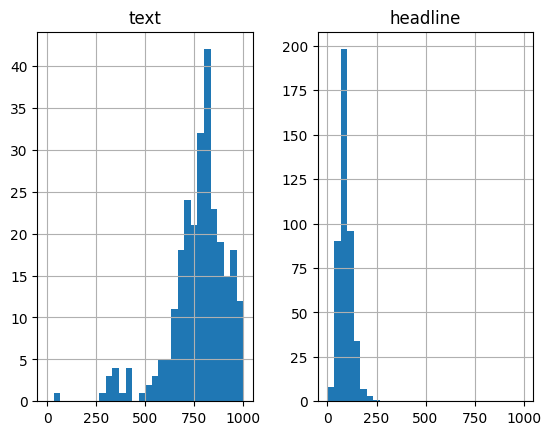

In [15]:
import matplotlib.pyplot as plt
text_word_count = []
headline_word_count = []

# populate the lists with sentence lengths
for i in df['text']:
      temp=i.split()
      text_word_count.append(len(temp))

for j in df['headline']:
  #print(j)
  temp1=j.split()
  headline_word_count.append(len(temp1))

length_df = pd.DataFrame({'text':text_word_count, 'headline':headline_word_count})
length_df.hist(bins = 30,range=[0,1000])
plt.show()

In [22]:
# From the graph
# We can fix maximum length of text = 150 since most of the reviews have a length of 150 and maximum headline length of 50, since maximum headlines are of size 40

max_len_text = 1100
max_len_headline = 100

In [25]:
cnt=0
for i in df['text']:
    if(len(i.split())<=max_len_text):
        cnt=cnt+1
print(cnt/len(df['text']))

0.7025171624713958


In [26]:
copy_df = df.copy(deep=True)

In [27]:
text1 = np.array(copy_df['text'])
headline1 = np.array(copy_df['headline'])

short_text=[]
short_summary=[]

for i in range(len(text1)):
    
    if(len(headline1[i].split())<=max_len_headline):
        short_summary.append(headline1[i])
    else:
        temp = " ".join(headline1[i].split()[:max_len_headline])
        short_summary.append(temp)

    if(len(text1[i].split())<=max_len_text):
        short_text.append(text1[i])
    else:
        temp = " ".join(text1[i].split()[:max_len_text])
        short_text.append(temp)
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [29]:
df.describe()

,text,summary
count,437,437
unique,435,436
top,music thank hello everyone wonderful wednesday...,cnn brian todd tells us president biden trip w...
freq,2,2


Selecting text and headlines below the maximum lengths 

In [30]:
# Validating the lengths
text1 =np.array(df['text'])
headline1=np.array(df['summary'])

for i in range(len(text1)):
    if(len(headline1[i].split())>=max_len_text):
      print(i)


In [31]:
print(df['text'][50],df['summary'][50],sep='\n')

music thank hello lovely people believe december st already swear feels like november yesterday like one month remaining year let us make great corey weyer cnn starting news china today protesters taking streets rare display defiance country ruling communist party people rising zero covid policy strategy china using limit spread covid policy kept china virus levels lower large countries placed millions people lockdown quarantine limiting access food medicine family also hurting economy restricting travel anger boiled last week fire apartment building killed least people believe tragic deaths could prevented anti virus restrictions may prevented first responders arriving quickly authorities messing around comes shutting demonstrations acts defiance online well hundreds armored vehicles deployed streets authorities vowed quote strike hard necessary number people detained result resistance known time punishment protesting china severe senior international correspondent ivan watson china p

**Splitting data into train, test  --  70 - 30**

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['summary'],test_size=0.3,random_state=0,shuffle=True) 

In [33]:
print(len(x_train))
print(len(x_test))

305
132


Language Translation

In [34]:
#from torchtext.data import Field, BucketIterator

In [35]:
#pip install spacy
#!python -m spacy download en

In [36]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [37]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [38]:
def readLangs(text, summary, reverse=False):
    print("Reading lines...")
    
    # Split every line into pairs and normalize
    text=np.array(text)
    summary=np.array(summary)
    pairs = [[text[i],summary[i]] for i in range(len(text))]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(summary)
        output_lang = Lang(text)
    else:
        input_lang = Lang(text)
        output_lang = Lang(summary)

    return input_lang, output_lang, pairs

In [39]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name,"--------------------", input_lang.n_words)
    #print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs

In [40]:
input_lang, output_lang, pairs = prepareData(x_train, y_train , False)
#print(random.choice(pairs))


Reading lines...
Read 305 sentence pairs
Counting words...
Counted words:
['like maybe talking somebody new one first things notice maybe say maybe big nerd first kind put label time come embrace way never expected nerd lot different things cosmology one watch hours ted talks lectures cosmology sometimes nerd meditation meditating years process continually bringing attention back breath sounds simple theory practice one difficult things one rewarding things world thing nerdy curious something probably would expect idea productivity mean productivity kind really businesslike sense boil life spreadsheet really become efficient fire excel track life mean productivity sense making better use limited time every day time things actually meaningful us fortunate enough know idea productivity decade fortunate enough graduated university received couple full time job offers productive point figured time life something meaningful time started looking options productivity became one focuses thinki

In [41]:
pairs[1]

['seven years old sister five years old playing top bunk bed two years older sister time mean two years older time meant everything wanted wanted play war top bunk beds one side bunk bed put joe soldiers weaponry side sister little ponies ready cavalry charge differing accounts actually happened afternoon since sister us today let tell true story sister little clumsy side somehow without help push older brother amy disappeared top bunk bed landed crash floor nervously peered side bed see befallen fallen sister saw landed painfully hands knees fours ground nervous parents charged making sure sister played safely quietly possible seeing accidentally broken amy arm one week heroically pushing way oncoming imaginary sniper bullet yet thanked trying hard could even see coming trying hard best behavior saw sister face wail pain suffering surprise threatening erupt mouth wake parents long winter nap settled thing frantic seven year old brain could think avert tragedy children seen hundreds ti

In [42]:
len(pairs)

305

In [43]:
#---- Deep Model

In [44]:
SOS_token = 0
EOS_token = 1

In [45]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [46]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [47]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.LSTM = nn.LSTM(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.LSTM(output, hidden)
        return output, hidden

    def initHidden(self):
        return (torch.zeros(1, 1, self.hidden_size, device=device),torch.zeros(1, 1, self.hidden_size, device=device)) 

In [48]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.LSTM = nn.LSTM(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.LSTM(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [49]:
MAX_LENGTH=1100

In [50]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size*2 , self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size*2 , self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.LSTM = nn.LSTM(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

        #print('Decoder --- atndecoder')

    def forward(self, input, hidden, encoder_outputs):
        #print("inside forward decoder")
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        #print("embedded size", embedded.size())
        #print(embedded[0].size()) #1,300
        #print(hidden[0].size()) # 1, 1, 300
        #print("diff or not")

        #temp = torch.cat((embedded[0], hidden[0]), 1)
        
        #print(temp)
        #print(temp.size())

        attn_weights = F.softmax(self.attn(torch.cat((embedded[0], hidden[0][0]), 1)), dim=1)
        #print("after getting attn weights softmax")
        #print(attn_weights.size())
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.LSTM(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [51]:
#teacher_forcing_ratio = 0.5
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0
    #print('bbbbbbb-->>> input length', input_length)

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
        #print("priting before error")
        #print(encoder_output.size())
        #print(encoder_outputs.size())
        temp = encoder_output[0, 0]
        #print(temp)
        encoder_outputs[ei] = temp

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    #use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False
    #Without teacher forcing: use its own predictions as the next input

    #print('aaaaa-->>>')

    for di in range(target_length):
      decoder_output, decoder_hidden, decoder_attention = decoder(
      decoder_input, decoder_hidden, encoder_outputs)


      topv, topi = decoder_output.topk(1)
      
      decoder_input = topi.squeeze().detach()  # detach from history as input
      
      loss += criterion(decoder_output, target_tensor[di])
      
      if decoder_input.item() == EOS_token:
             break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [52]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [53]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [54]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    print("Training....")
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    print(">>>", len(training_pairs))
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        if iter% 1000 == 0:
            print(iter,"/",n_iters + 1)
            print("check:", input_tensor.shape, target_tensor.shape)
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        input_length = input_tensor.size(0)
        if(input_length > 150):
          #print(input_length)
          continue
      
        loss = train(input_tensor, target_tensor, encoder,decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [55]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        #print('cccccc->>>>')

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [56]:
def evaluateRandomly(encoder, decoder, n=5):
    text=list()
    headline=list()
    pred_headline=list()    
    for i in tqdm(range(n)):
        pair = random.choice(pairs)
        
        if(len(pair[0].split())>=max_len_text):
          continue
        else:
          if(i%1000==0):
            print(i*100/n,"% complete")
          
          #print('>', pair[0])
          text.append(pair[0])
          #print('=', pair[1])
          headline.append(pair[1])
          output_words, attentions = evaluate(encoder, decoder, pair[0])
          output_sentence = ' '.join(output_words)
          pred_headline.append(output_sentence)
          #print('<', output_sentence)
          #print('')
    return(text,headline,pred_headline)

In [58]:
hidden_size = 512
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 150000, print_every=1000)

Training....
>>> 150000
1000 / 150001
check: torch.Size([962, 1]) torch.Size([79, 1])
2000 / 150001
check: torch.Size([707, 1]) torch.Size([66, 1])
3000 / 150001
check: torch.Size([1101, 1]) torch.Size([101, 1])
4000 / 150001
check: torch.Size([1100, 1]) torch.Size([100, 1])
5000 / 150001
check: torch.Size([729, 1]) torch.Size([64, 1])
6000 / 150001
check: torch.Size([926, 1]) torch.Size([85, 1])
7000 / 150001
check: torch.Size([861, 1]) torch.Size([82, 1])
8000 / 150001
check: torch.Size([1101, 1]) torch.Size([101, 1])
9000 / 150001
check: torch.Size([954, 1]) torch.Size([82, 1])
10000 / 150001
check: torch.Size([934, 1]) torch.Size([86, 1])
11000 / 150001
check: torch.Size([1101, 1]) torch.Size([101, 1])
12000 / 150001
check: torch.Size([355, 1]) torch.Size([35, 1])
13000 / 150001
check: torch.Size([881, 1]) torch.Size([65, 1])
14000 / 150001
check: torch.Size([363, 1]) torch.Size([39, 1])
15000 / 150001
check: torch.Size([646, 1]) torch.Size([68, 1])
16000 / 150001
check: torch.Size

In [59]:
text,headline,pred_headline=evaluateRandomly(encoder1, attn_decoder1, 15000)

pred_df_LSTM=pd.DataFrame()

pred_df_LSTM['text']=text
pred_df_LSTM['headline']=headline
pred_df_LSTM['pred_headline']=pred_headline

  0%|          | 0/15000 [00:00<?, ?it/s]

0.0 % complete


  7%|▋         | 1001/15000 [02:37<38:30,  6.06it/s]

6.666666666666667 % complete


 27%|██▋       | 4001/15000 [10:45<27:28,  6.67it/s]

26.666666666666668 % complete


 40%|████      | 6000/15000 [15:59<26:11,  5.73it/s]

40.0 % complete


 53%|█████▎    | 8001/15000 [21:30<14:24,  8.10it/s]

53.333333333333336 % complete


 73%|███████▎  | 11000/15000 [29:22<14:07,  4.72it/s]

73.33333333333333 % complete


 87%|████████▋ | 13000/15000 [34:56<04:08,  8.05it/s]

86.66666666666667 % complete


100%|██████████| 15000/15000 [40:16<00:00,  6.21it/s]


In [60]:
text, headline, pred_headline

Output hidden; open in https://colab.research.google.com to view.

In [61]:
for i in range(len(pred_df_LSTM)):
  print("original Summary>>>",pred_df_LSTM.iloc[i]['headline'])
  print("Predicted Summary>>>",pred_df_LSTM.iloc[i]['pred_headline'])
  print('-----------------------------------------------------------------------')

Streaming output truncated to the last 5000 lines.
Predicted Summary>>> gordon ramsay new cookbook ramsay inspired hit youtube series instagram live name book show tricks trade order prove cook good food minutes exciting chance pre order ramsey click link find <EOS>
-----------------------------------------------------------------------
original Summary>>> polarized divided ever history pew research less likely compromise means listening ask st century skill important able sustain coherent confident conversation want state opinion without opportunity argument pushback growth write blog start questions equate experience tell much hate job experiences individual average person talks word per minute listen words per minute stephen covey said us listen intent understand says man ever listened way job
Predicted Summary>>> gordon ramsay new cookbook ramsay inspired hit youtube series instagram live name book show tricks trade order prove cook good food minutes exciting chance pre order ramse

In [62]:
import os

save_data_path = data_dir + 'LSTM_Attention/' + 'all.xlsx'
pred_df_LSTM = pred_df_LSTM.to_excel(save_data_path, index=False)

In [63]:
def calculate_rogue(src_trg, pred_trg):
      
  #cut off <eos> token
  pred_trg = pred_trg[:-6]

  
  if (len(pred_trg) == 0):
    rogue_score = 0.0
  else:
    s = rouge.get_scores(pred_trg, src_trg, avg= True)
    rogue_score = s['rouge-1']['f']
    
  return rogue_score

In [67]:
attn_plot_threshold = 0.45

def evaluateRandomlyprint_1(encoder, decoder, n=5):
    text=list()
    headline=list()
    pred_headline=list()    

    for i in range(n):
        pair = random.choice(pairs)
        
        if(len(pair[0].split())>=500):
          continue
        else:
          #if(i%1000==0):
           # print(i*100/n,"% complete")
          
          tokenized_input = nltk.word_tokenize(pair[0])
          #print(len(tokenized_input))
          output_words, attentions = evaluate(encoder, decoder, pair[0])

          output_sentence = ' '.join(output_words)

          #get rogue f-score -- need to pass tokenized version here
          #print(pair[0])
          #print(output_sentence)
          score = calculate_rogue(pair[0], output_sentence)
          #if(score>0.25):
           # print(score)

          if score > attn_plot_threshold:
            plot_attention(tokenized_input, output_words, attentions, i)
          
          #print('<', output_sentence)
          #print('')
    #return(text,headline,pred_headline)

In [68]:
# sentence, translation, attention
def plot_attention(sentence, predicted_sentence, attention, i):
  plt.rcParams.update({'font.size': 18})

  fig = plt.figure(figsize=(30,30))

  ax = fig.add_subplot(1,1,1)
  #print(len(attention))  
  ax.matshow(attention, cmap='bone')
  #fig.colorbar(cax)
  #fontdict = {'fontsize': 25}

  #ax.set_xticklabels([''] + sentence.split(' ') +['<EOS>'], rotation=90)
  #ax.set_yticklabels([''] + predicted_sentence)

  ax.set_xticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'], rotation=90)
  ax.set_yticklabels(['']+predicted_sentence)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
  #xlim(right=3)

  plt.show()
  #plt.close()

In [69]:
!pip install rouge
import nltk
nltk.download('punkt')
from rouge import Rouge

rouge = Rouge()


evaluateRandomlyprint_1(encoder1, attn_decoder1,15000)
#plt.close()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install rouge
import nltk
nltk.download('punkt')
from rouge import Rouge

rouge = Rouge()

evaluateRandomlyprint_1(encoder1, attn_decoder1,15000)
#plt.close()